# MSA 2024 Phase 2 - Part 1

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [2]:
#Importing data
Sales_data = pd.read_csv("store_sales.csv", encoding='latin1',delimiter=',',header='infer')
Sales_data["Order Date"] = pd.to_datetime(Sales_data["Order Date"])
Sales_data["Ship Date"] = pd.to_datetime(Sales_data["Ship Date"])
print("Below is the first 10 rows in the dataset")
print(Sales_data.head(n=10))
print("Below is the basic information about the data contained in each column")
print(Sales_data.info())
print("Below is the basic summary of the data")
print(Sales_data.describe())

#sorting the dataset by order date for better visibility
Sales_data.sort_values(by='Order Date', inplace = True) 

Below is the first 10 rows in the dataset
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
3       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
4      11  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
5      24  US-2017-156909 2017-07-16 2017-07-18    Second Class    SF-20065   
6      25  CA-2015-106320 2015-09-25 2015-09-30  Standard Class    EB-13870   
7      28  US-2015-150630 2015-09-17 2015-09-21  Standard Class    TB-21520   
8      30  US-2015-150630 2015-09-17 2015-09-21  Standard Class    TB-21520   
9      37  CA-2016-117590 2016-12-08 2016-12-10     First Class    GH-14485   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute

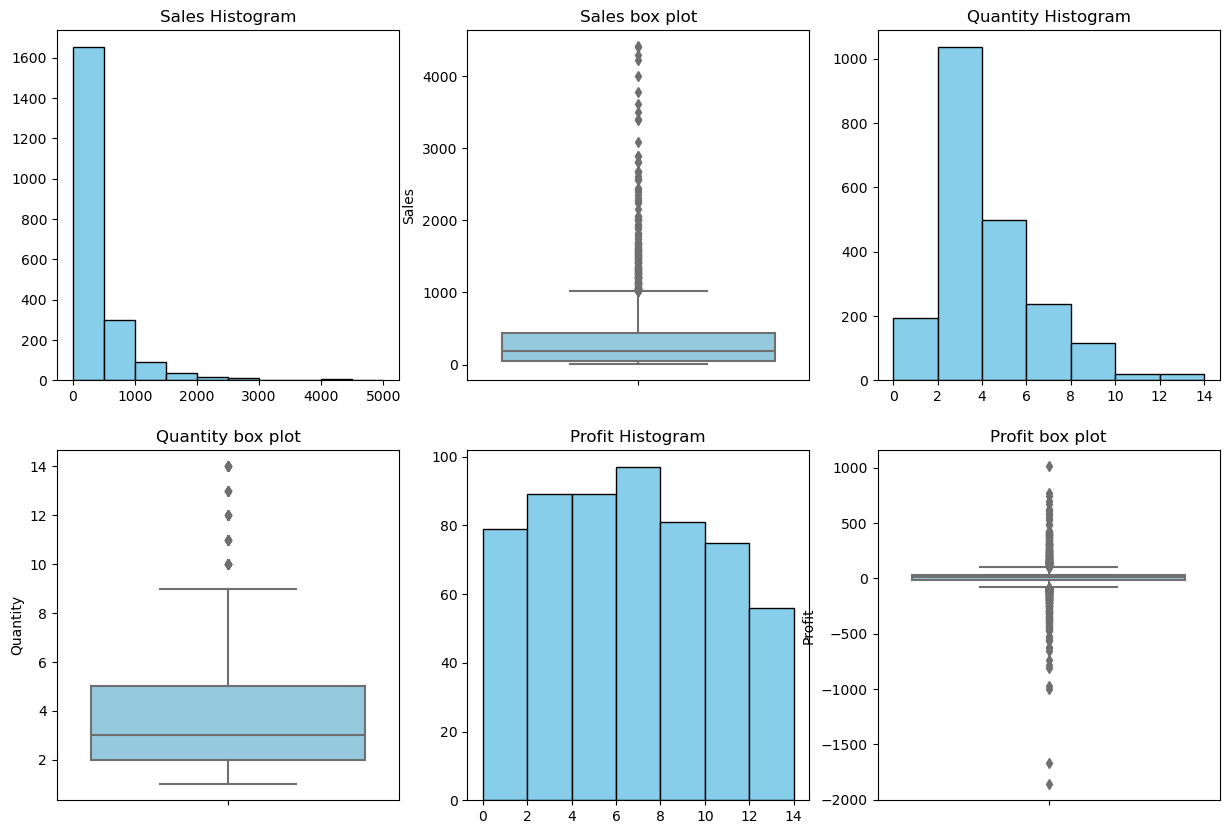

In [3]:
# Visualizing numeric columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) #creates the frame to fill the plots in

# Histogram of sales 
axes[0, 0].hist(Sales_data['Sales'], bins=(0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000), color='skyblue', edgecolor='black')
axes[0, 0].set_title('Sales Histogram')

# Box plot of sales
sns.boxplot(y=Sales_data['Sales'], color='skyblue', ax=axes[0, 1])
plt.ylabel('Sales')
axes[0, 1].set_title('Sales box plot')

# Histogram of Quantity 
axes[0, 2].hist(Sales_data['Quantity'], bins=(0,2,4,6,8,10,12,14), color='skyblue', edgecolor='black')
axes[0, 2].set_title('Quantity Histogram')

# Box plot of Quantity
sns.boxplot(y=Sales_data['Quantity'], color='skyblue', ax=axes[1, 0])
plt.ylabel('Quantity')
axes[1,0].set_title('Quantity box plot')

# Histogram of Profit 
axes[1, 1].hist(Sales_data['Profit'], bins=(0,2,4,6,8,10,12,14), color='skyblue', edgecolor='black')
axes[1, 1].set_title('Profit Histogram')

# Box plot of Profit
sns.boxplot(y=Sales_data['Profit'], color='skyblue', ax=axes[1, 2])
axes[1,2].set_title('Profit box plot')

plt.show()


## 2. Clean 

In [4]:
missing_data = Sales_data.isnull().sum().to_frame()
missing_data


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Based on the above result we can see that there are no missing data. Therefore we have a complete data set. However we can see from the Histogram and Box plots that here are many outliers. An important response variable we aim to look at is Sales which seems to be heavily right skewed. Sales have a minimum value of 1.892 as seen in the summary output. This makes sense because usually we don't expect negative values for sales. 

In [5]:
Sales_data.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
print("Unique Categories: ", len(Sales_data['Category'].unique()))
print("Unique Sub- Categories: ", len(Sales_data['Sub-Category'].unique()))
print("Unique Regions: ", len(Sales_data['Region'].unique()))
print("Unique Ship Mode: ",len(Sales_data['Ship Mode'].unique()))
print("Unique States: ", len(Sales_data['State'].unique()))
print("Unique Cities: ",len(Sales_data['City'].unique())) 
print("Unique Countries: ",len(Sales_data['Country'].unique()))
print("Unique Segments: ",len(Sales_data['Segment'].unique()))


Unique Categories:  1
Unique Sub- Categories:  4
Unique Regions:  4
Unique Ship Mode:  4
Unique States:  48
Unique Cities:  371
Unique Countries:  1
Unique Segments:  3


Category and Country have 1 unique value therefore they're dropped because they don't add information. City contains a large number of unique values which means that it's not suitable for one-hot encoding. Hence the variables to be one-hot encoded are Sub-Category, Regions, Ship Mode, State, Segment.

In [7]:
columns_to_keep = ['Sub-Category', 'Region', 'State', 'Ship Mode', 'Sales', 'Quantity', 'Discount', 'Profit', 'Segment', 'Order Date']
Reduced_Sales_data = Sales_data[columns_to_keep]

# Apply one-hot encoding to relevant columns
categorical_columns = ['Sub-Category', 'Region', 'State', 'Ship Mode', 'Segment']
Sales_data_encoded = pd.get_dummies(Reduced_Sales_data, columns=categorical_columns, drop_first=False) # can also drop_first = True however since the number of new vectors is relatively low we can keep them for visualisation
Sales_data_encoded.head()

,Sales,Quantity,Discount,Profit,Order Date,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Region_Central,...,State_West Virginia,State_Wisconsin,State_Wyoming,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office
1577,2573.820,9,0.0,746.4078,2014-01-06,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1626,76.728,3,0.6,-53.7096,2014-01-07,False,False,True,False,True,...,False,False,False,False,False,False,True,True,False,False
181,51.940,1,0.0,21.2954,2014-01-10,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
150,9.940,2,0.0,3.0814,2014-01-11,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
631,545.940,6,0.0,87.3504,2014-01-13,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [8]:
# Sum or aggregate numeric features by Order Date
numeric_aggregation = Sales_data_encoded.groupby('Order Date').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Profit': 'sum'
}).reset_index()

# Sum one-hot encoded variables by Order Date
one_hot_aggregation = Sales_data_encoded.groupby('Order Date').sum().reset_index()
one_hot_aggregation.drop(columns=['Sales', 'Quantity','Discount','Profit'], inplace=True)
# Ensure the date columns are aligned correctly
aggregated_df = pd.merge(numeric_aggregation, one_hot_aggregation, on='Order Date', how='left')
aggregated_df.tail()


,Order Date,Sales,Quantity,Discount,Profit,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Region_Central,...,State_West Virginia,State_Wisconsin,State_Wyoming,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office
884,2017-12-24,1393.4940,14,0.100000,222.9092,0,3,2,0,0,...,0,0,0,0,0,0,5,2,1,2
885,2017-12-25,832.4540,14,0.160000,-7.0763,1,1,2,1,0,...,0,0,0,1,0,1,3,4,1,0
886,2017-12-28,551.2568,17,0.336667,-49.6680,1,2,3,0,4,...,0,0,0,1,0,0,5,1,5,0
887,2017-12-29,2330.7180,26,0.033333,492.6236,0,4,2,0,0,...,0,0,0,0,0,3,3,5,1,0
888,2017-12-30,323.1360,4,0.200000,12.1176,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


Looking at the first 5 rows we can see that some dates are skipped. Perhaps no orders were made on those dates. I have aggregated the data further to be monthly data.

In [9]:
aggregated_df.set_index('Order Date', inplace=True) # must set the order date as the index for it to be aggregated correctly

In [10]:
# Downsample to monthly frequency, summing the sales for each month

# Resample the data to monthly frequency, however Discount is a ratio so it should be the mean instead of sum

monthly_resampled_df = aggregated_df.resample('M').agg({
    
    'Discount': 'mean',
    
    # One-hot encoded columns should be summed
    **{col: 'sum' for col in aggregated_df.columns if col not in [ 'Discount']}
})

monthly_resampled_df

,Discount,Sales,Quantity,Profit,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Region_Central,Region_East,...,State_West Virginia,State_Wisconsin,State_Wyoming,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-01-31,0.201923,6242.5250,70,805.4665,5,3,11,1,4,3,...,0,0,0,5,0,3,12,14,3,3
2014-02-28,0.160000,1839.6580,23,120.6917,0,2,4,1,4,0,...,0,0,0,1,1,2,3,5,1,1
2014-03-31,0.203088,14573.9560,131,-1128.6550,3,12,10,8,7,7,...,0,0,0,4,1,4,24,16,9,8
2014-04-30,0.113095,7944.8370,81,554.3801,1,7,11,7,4,6,...,0,0,0,2,1,4,19,9,8,9
2014-05-31,0.269792,6912.7870,97,-349.8776,2,9,9,4,9,7,...,0,1,0,3,2,5,14,15,9,0
2014-06-30,0.170351,13206.1256,122,596.3153,3,8,11,8,8,8,...,0,0,0,2,0,6,22,21,6,3
2014-07-31,0.176481,10821.0510,114,374.2467,2,13,12,6,5,7,...,0,0,0,4,2,3,24,15,12,6
2014-08-31,0.147917,7320.3465,107,663.4717,2,5,12,5,3,4,...,0,0,0,4,0,5,15,15,8,1
2014-09-30,0.149097,23816.4808,208,1858.5976,5,15,28,8,14,24,...,0,0,0,11,3,11,31,31,13,12


In [11]:
monthly_resampled_df.shape

(48, 67)

After aggregating the data, checking the shape of the data shows that we now have monthly data for years 2014 to 2017 with no skipped month in between which makes it suitable for timeseries analysis. 

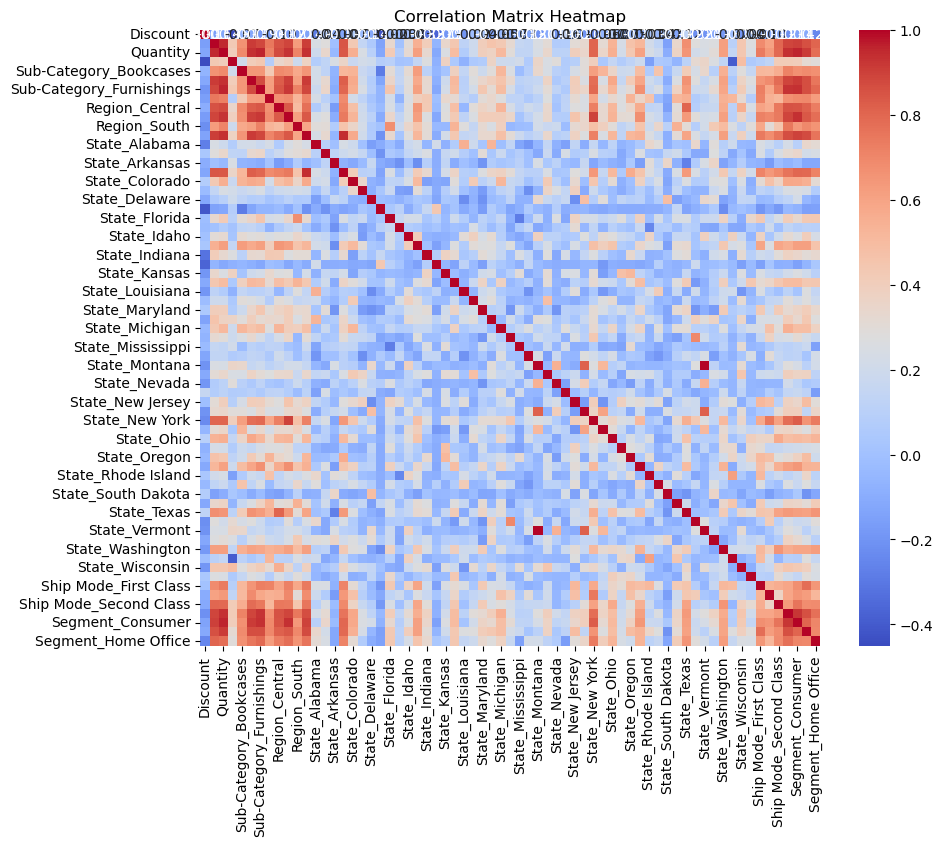

In [12]:
# correlation matrix
correlation_matrix = monthly_resampled_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
threshold = 0.7

# Find high correlations
high_correlations = np.abs(correlation_matrix) > threshold

# Exclude diagonal (self-correlations) and duplicate correlations
high_correlations = high_correlations.mask(np.eye(len(correlation_matrix), dtype=bool))
high_correlations

,Discount,Sales,Quantity,Profit,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Region_Central,Region_East,...,State_West Virginia,State_Wisconsin,State_Wyoming,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office
Discount,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sales,False,NaN,True,False,False,True,True,True,True,True,...,False,False,False,False,False,True,True,True,True,True
Quantity,False,True,NaN,False,False,True,True,True,True,True,...,False,False,False,True,False,True,True,True,True,True
Profit,False,False,False,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sub-Category_Bookcases,False,False,False,False,NaN,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ship Mode_Second Class,False,True,True,False,False,True,True,False,True,True,...,False,False,False,False,False,NaN,False,True,False,False
Ship Mode_Standard Class,False,True,True,False,True,True,True,False,True,True,...,False,False,False,False,False,False,NaN,True,True,True
Segment_Consumer,False,True,True,False,False,True,True,False,True,True,...,False,False,False,False,False,True,True,NaN,True,True
Segment_Corporate,False,True,True,False,False,True,True,False,True,True,...,False,False,False,True,False,False,True,True,NaN,False


C:\Users\filmo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


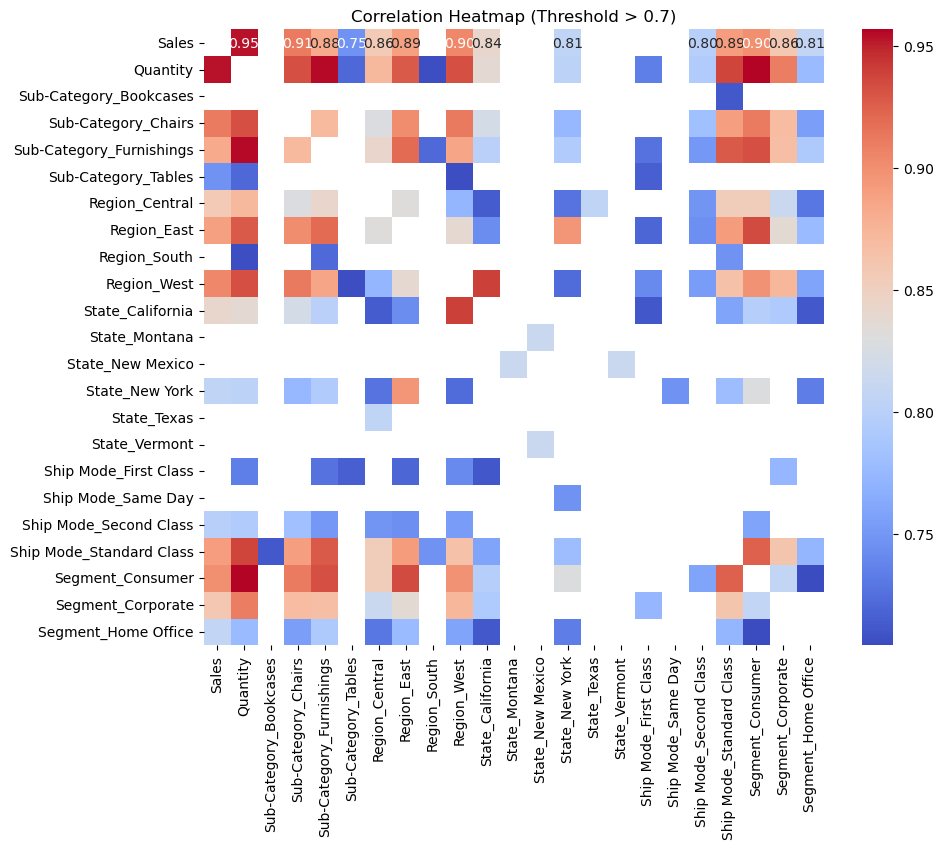

In [14]:
# Compute correlation matrix
correlation_matrix = monthly_resampled_df.corr()

# Define threshold for high correlation
threshold = 0.7

# Create mask for correlations greater than threshold
high_correlations = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Drop columns and rows that don't meet the threshold
drop_columns = high_correlations.columns[high_correlations.isnull().all()]
high_correlations.drop(columns=drop_columns, inplace=True)
high_correlations.drop(index=drop_columns, inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap (Threshold > {threshold})')
plt.show()

It seems that alot of the one hot encoded variables are highly correlated to each other. Some represent categories within the same overarching categorical feature (like different states within regions and different sub-categories within a category). High correlations (close to 1 or -1) indicate redundancy or overlap in the information they provide. This can lead to unstable estimates in regression models. Perhaps drop quantity as it seems to be highly correlated with sales. Before dropping any variables however PCA will be applied to reduce the dimensionality of correlated variables while retaining most of the variation in the data.

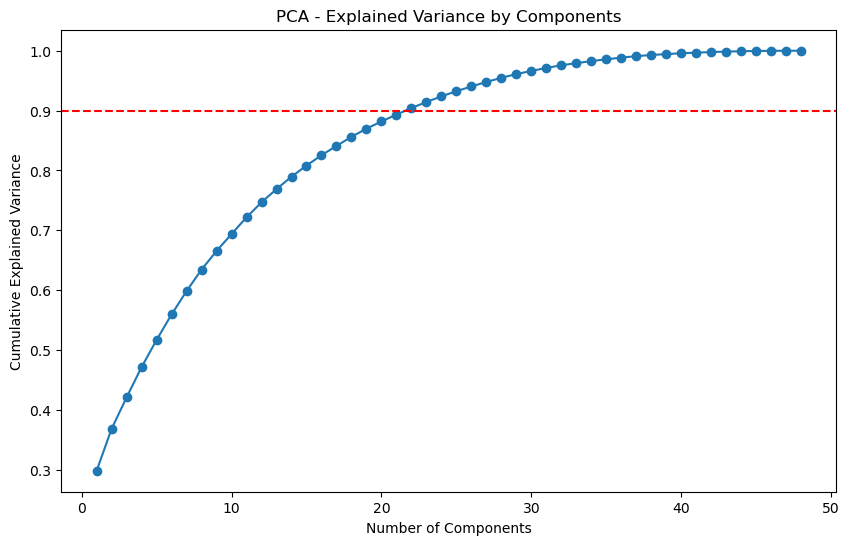

Number of components selected: 22
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -4.787766  1.616009  0.725721  1.493238  0.385224 -3.407260 -3.579847   
1 -6.844101  1.137528 -0.734516 -0.250031 -0.163658  1.310647  0.331928   
2 -2.351119 -0.827343  0.802560 -1.438161 -0.243797  0.648810 -0.445287   
3 -3.471943 -0.392171  1.394296  0.900985  0.306232  1.027523  0.465455   
4 -3.930158 -0.569109 -0.823246  0.450456  0.504055 -0.677452  1.620650   

        PC8       PC9      PC10  ...      PC14      PC15      PC16      PC17  \
0 -1.378376 -2.449833  0.348940  ... -0.243760 -1.750406  0.229291  1.462273   
1  0.671109  0.589831  0.569183  ...  0.000841 -1.281665 -0.504411 -0.234419   
2  1.149571 -0.219849  0.519550  ...  0.223568  1.344759  0.309599 -0.044163   
3  1.328159 -1.291206 -0.016231  ... -0.980590 -0.078060 -0.899672  0.468284   
4 -1.390188  0.405253 -0.222862  ... -0.353520  2.600517  1.546345 -0.995171   

       PC18      PC19      PC20   

In [22]:

# Drop the index 'Order Date' for PCA purposes
df_pca = monthly_resampled_df.reset_index(drop=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Plot the explained variance ratio to determine the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Components')
plt.axhline(y=0.9, color='r', linestyle='--')  # 90% threshold line
plt.show()

# Determine the number of components that explain at least 90% of the variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, total in enumerate(cumulative_variance) if total >= 0.9) + 1

# Print the number of components
print(f"Number of components selected: {n_components}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

# Include 'Order Date' for further time series analysis
pca_df['Order Date'] = monthly_resampled_df.index.values

print(pca_df.head())


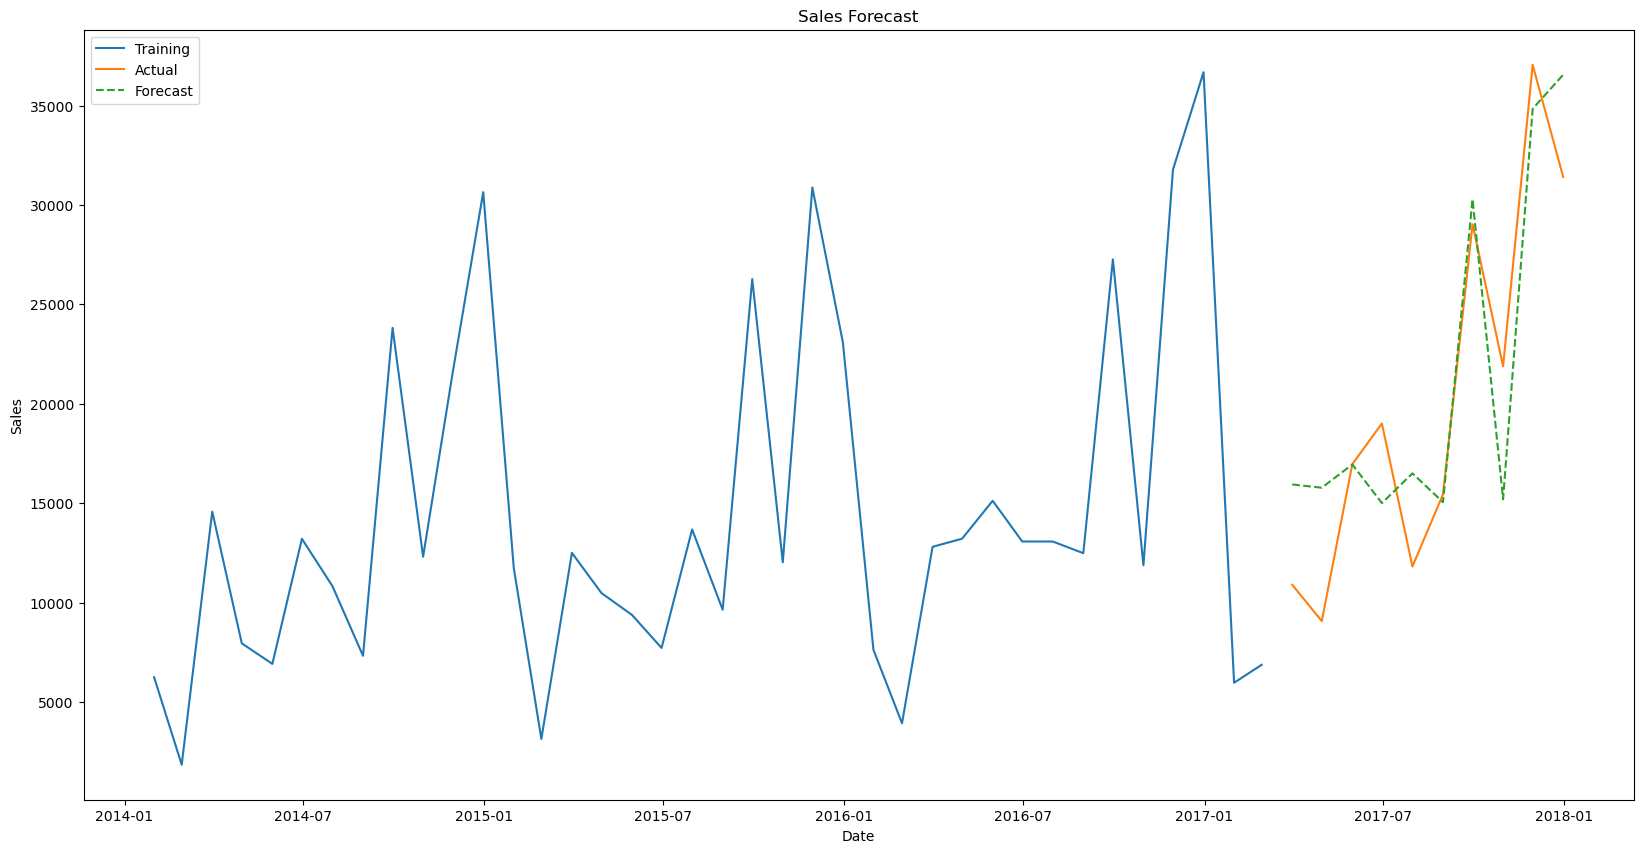

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

X = pca_df.drop(columns=['Order Date'])  # Exclude 'Order Date' if it's included in pca_df
y = monthly_resampled_df['Sales']  # Assuming 'Sales' is your target variable

# Train-test split
train_size = int(len(X) * 0.8)  # 80-20 split
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fit SARIMA model (example)
model = SARIMAX(y_train,  order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
results = model.fit()

# Evaluate model (example)
forecast = results.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, dynamic=False)

# Plotting example (adjust according to your model and data)
plt.figure(figsize=(20, 10))
plt.plot(y_train, label='Training')
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Forecast', linestyle='--')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 3. Visualise data

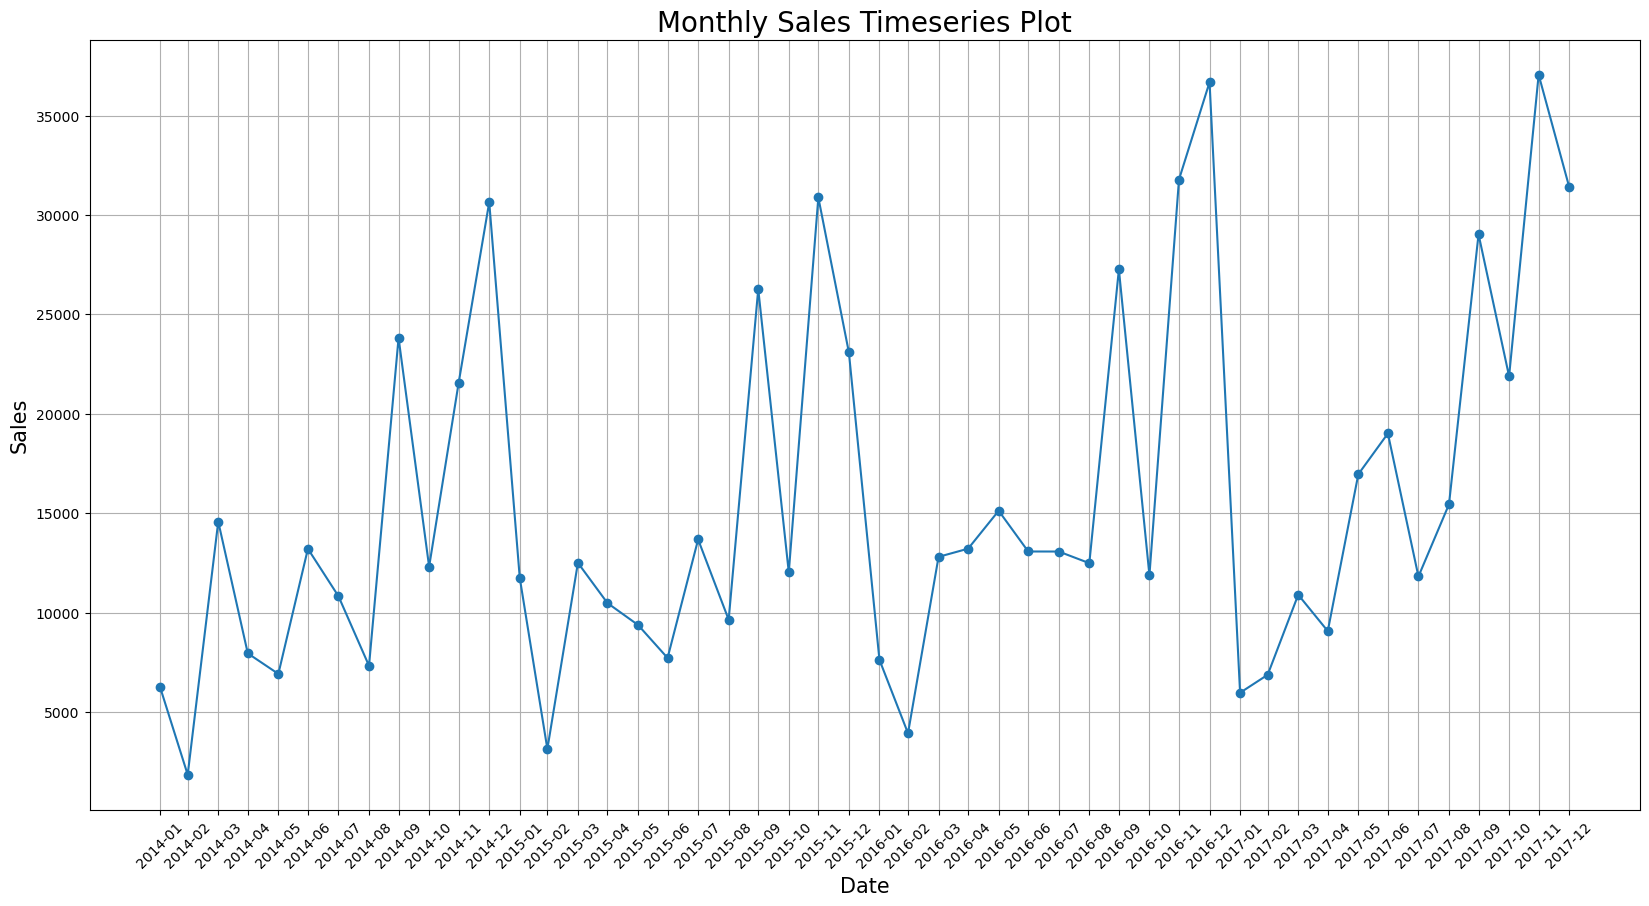

In [10]:
# Plotting the line graph of sales by date
#monthly_resampled_df = monthly_resampled_df.reset_index() #reset the index to gain access to the order date column
plt.figure(figsize=(20, 10))
plt.plot(monthly_resampled_df.index, monthly_resampled_df["Sales"], marker='o', linestyle='-')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.title("Monthly Sales Timeseries Plot", fontsize=20)
plt.xticks(monthly_resampled_df.index, [x.strftime('%Y-%m') for x in monthly_resampled_df.index], rotation=45)
plt.grid(True)
plt.show()

In [14]:
# Plot pairplot
monthly_resampled_df.columns

Index(['Order Date', 'Discount', 'Sales', 'Quantity', 'Profit',
       'Sub-Category_Bookcases', 'Sub-Category_Chairs',
       'Sub-Category_Furnishings', 'Sub-Category_Tables', 'Region_Central',
       'Region_East', 'Region_South', 'Region_West', 'State_Alabama',
       'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_Delaware', 'State_District of Columbia',
       'State_Florida', 'State_Georgia', 'State_Idaho', 'State_Illinois',
       'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky',
       'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_North Carolina', 'State_Ohio', 'State_Oklahoma', 'State_Oregon',
       'State_Pennsylvania', 'State

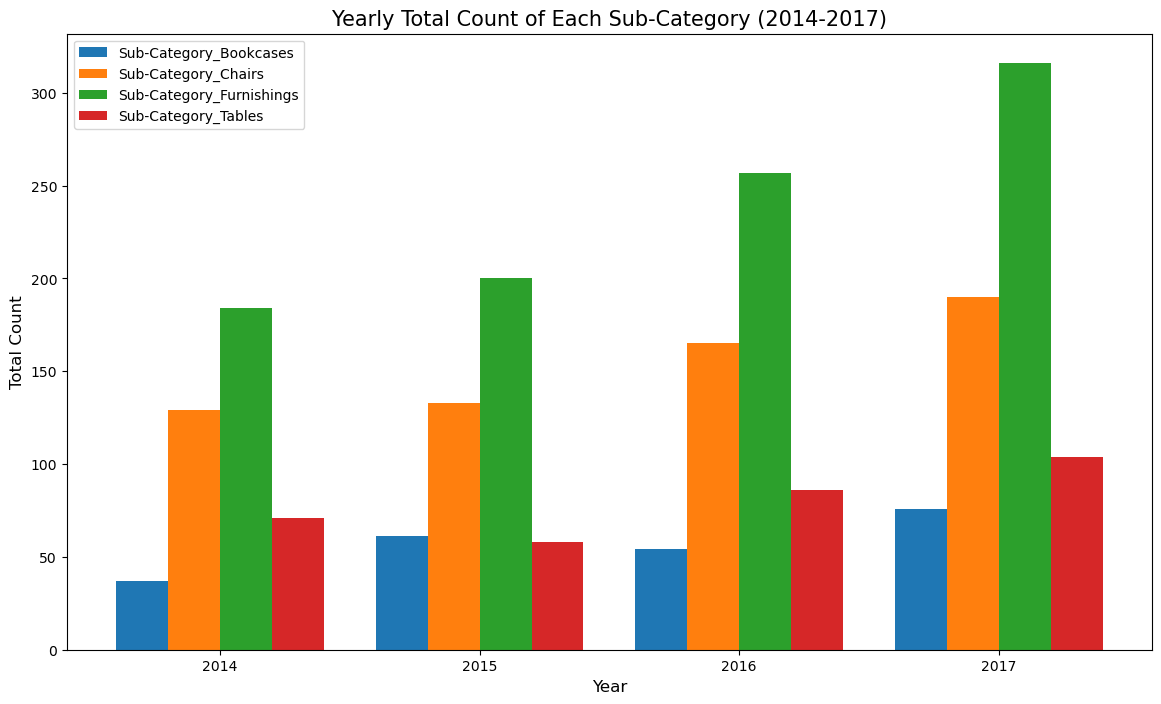

In [11]:
# Extract year from 'Order Date'
#monthly_resampled_df['Year'] = monthly_resampled_df['Order Date'].dt.year
monthly_resampled_df['Year'] = monthly_resampled_df.index.year

# List of sub-category columns
sub_category_columns = ['Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Furnishings', 'Sub-Category_Tables']
#Group by year and sum the sales and sub-category counts
yearly_aggregated = monthly_resampled_df.groupby('Year').agg({
    'Sales': 'sum',
    'Sub-Category_Bookcases': 'sum',
    'Sub-Category_Chairs': 'sum',
    'Sub-Category_Furnishings': 'sum',
    'Sub-Category_Tables': 'sum'
}).reset_index()

# Plotting the bar graph
years = yearly_aggregated['Year']
bar_width = 0.2  # Width of each bar

# Generate positions for each group of bars
bar_positions = [years + bar_width * i for i in range(len(sub_category_columns))]

plt.figure(figsize=(14, 8))

# Plot each sub-category
for i, col in enumerate(sub_category_columns):
    plt.bar(bar_positions[i], yearly_aggregated[col], width=bar_width, label=col)

# Adjust x-axis labels to be in the middle of the grouped bars
mid_positions = [year + (len(sub_category_columns) - 1) * bar_width / 2 for year in years]
plt.xticks(mid_positions, years)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.title('Yearly Total Count of Each Sub-Category (2014-2017)', fontsize=15)
plt.legend()
plt.show()

In [18]:
#checking for autocorrelation
autocorrelation_lag1 = monthly_resampled_df['Sales'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = monthly_resampled_df['Sales'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = monthly_resampled_df['Sales'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag12 = monthly_resampled_df['Sales'].autocorr(lag=12)
print("Twelve Month Lag: ", autocorrelation_lag12)


One Month Lag:  0.3113444663406203
Three Month Lag:  0.14771399488747913
Six Month Lag:  0.047628041045705054
Twelve Month Lag:  0.8842178561819388


We see that, with a twelve-month lag, the sales data is highly autocorrelated. This is further illustration of the long-term trends in the data.

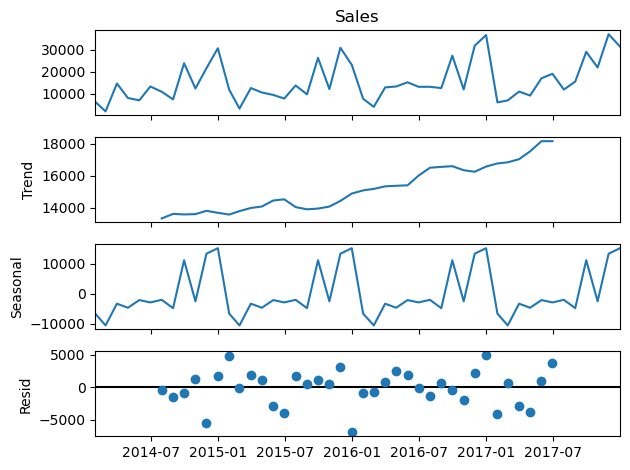

In [15]:

from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series

result = seasonal_decompose(monthly_resampled_df['Sales'], model='additive')
# Plot decomposition
result.plot()
plt.show()

From the decomposition plot we can see that here is a strong trend and seasonal pattern. However when we look at the residuals we can see there are some unusual values around December to February each year. For example around February 2015 seems to be a high residual. This could be due to the holiday shopping season or business cycles in retail.

In [49]:
# 
#Extract residuals
residuals = result.resid
# Identify outliers in the residuals
threshold = 3
outliers = residuals[abs(residuals) > threshold * residuals.std()]
print(outliers)

Series([], Freq: M, Name: resid, dtype: float64)


In [50]:
#checking the stationarity assumption before we fit the model for comparison 
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(residuals.dropna())
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -7.603198966899017
p-value: 2.3593438227156375e-11


The residuals are stationary (p-value ≤ 0.05), it suggests that the additive model has adequately captured the underlying patterns in the data. 

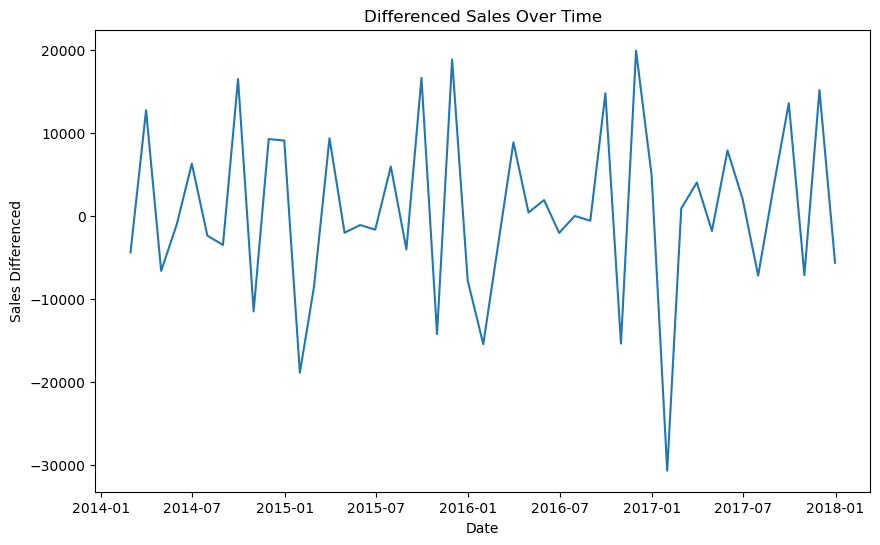

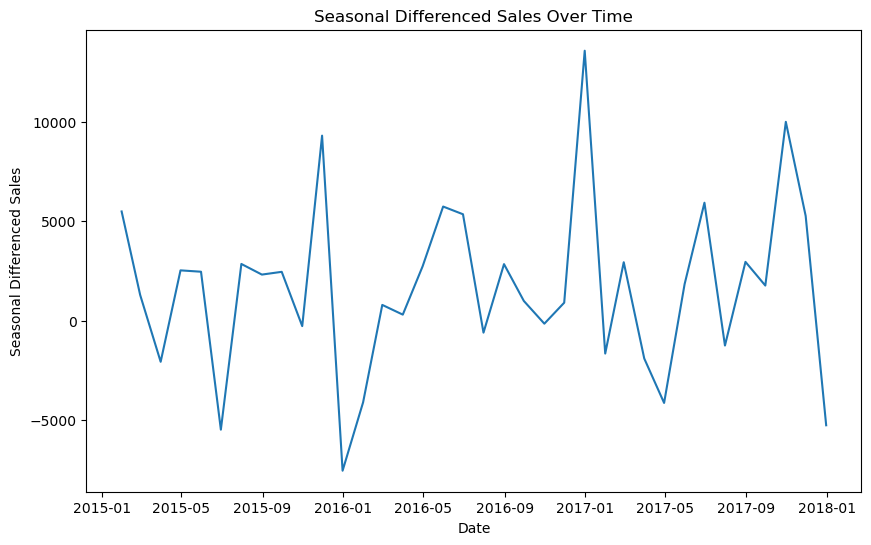

In [51]:
# First-order differencing
data_diff = monthly_resampled_df['Sales'].diff().dropna()

# Seasonal differencing
data_seasonal_diff = monthly_resampled_df['Sales'].diff(12).dropna()

# Plot differenced data
plt.figure(figsize=(10, 6))
plt.plot(monthly_resampled_df.index[1:], data_diff)
plt.xlabel('Date')
plt.ylabel('Sales Differenced')
plt.title('Differenced Sales Over Time')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(monthly_resampled_df.index[12:], data_seasonal_diff)
plt.xlabel('Date')
plt.ylabel('Seasonal Differenced Sales')
plt.title('Seasonal Differenced Sales Over Time')
plt.show()

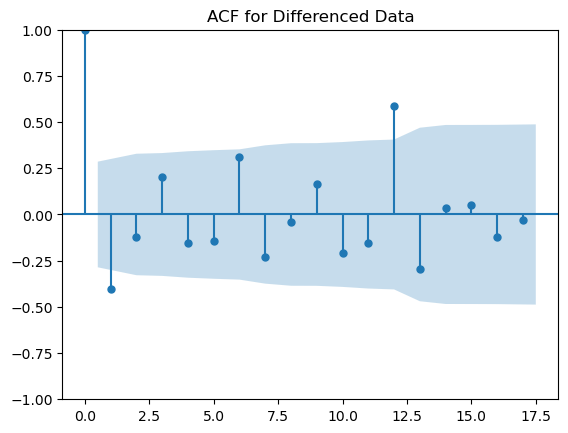

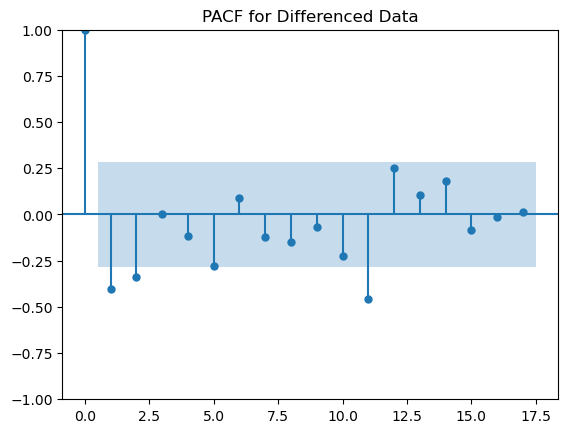

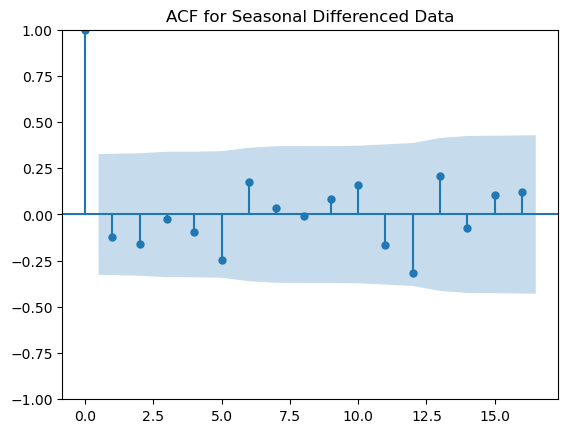

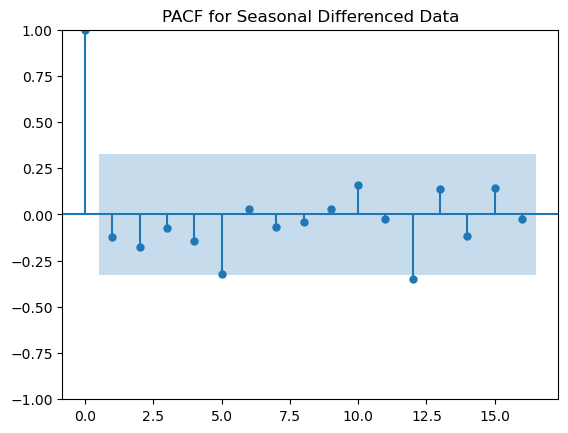

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for differenced data
plot_acf(data_diff)
plt.title('ACF for Differenced Data')
plt.show()

plot_pacf(data_diff)
plt.title('PACF for Differenced Data')
plt.show()

# ACF and PACF plots for seasonal differenced data
plot_acf(data_seasonal_diff)
plt.title('ACF for Seasonal Differenced Data')
plt.show()

plot_pacf(data_seasonal_diff)
plt.title('PACF for Seasonal Differenced Data')
plt.show()

## Fitting the model below 

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -350.214
Date:                             Sat, 06 Jul 2024   AIC                            708.428
Time:                                     16:17:14   BIC                            714.649
Sample:                                 01-31-2014   HQIC                           710.575
                                      - 12-31-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4147      0.145      2.864      0.004       0.131       0.698
ma.L1         -0.8777      

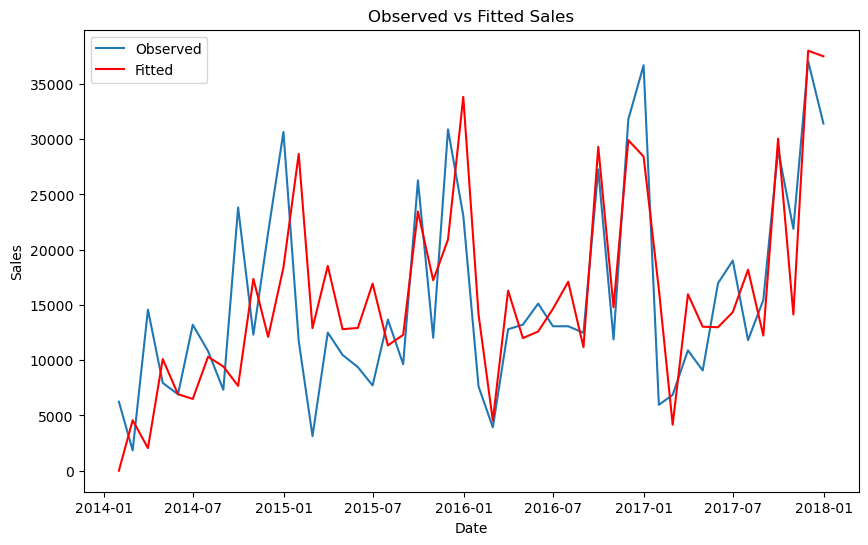

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model = SARIMAX(monthly_resampled_df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
model_results = model.fit()

# Print model summary
print(model_results.summary())

# Plot the fitted values
plt.figure(figsize=(10, 6))
plt.plot(monthly_resampled_df['Sales'], label='Observed')
plt.plot(model_results.fittedvalues, label='Fitted', color='red')
plt.title('Observed vs Fitted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


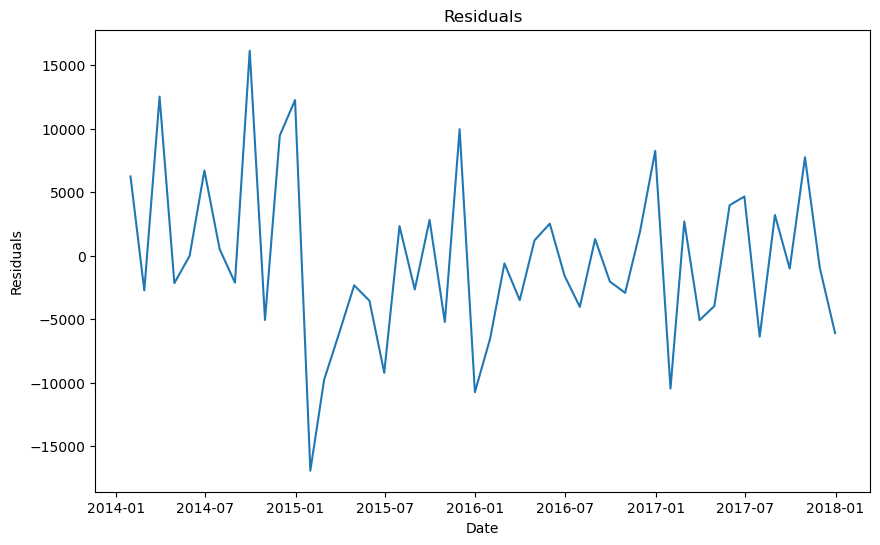

count       48.000000
mean      -355.332464
std       6641.599647
min     -16921.077074
25%      -4282.711462
50%      -1292.975112
75%       2919.272745
max      16139.325575
dtype: float64


In [59]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(model_results.resid)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Check residuals summary statistics
print(model_results.resid.describe())


In [62]:
#checking the stationarity assumption after we fit the model for comparison 
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(model_results.resid.dropna())
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -7.99569197871833
p-value: 2.407732022314802e-12


We can see that we have an even stronger p-value (p-value: 2.407732022314802e-12) after we fitted the model. 

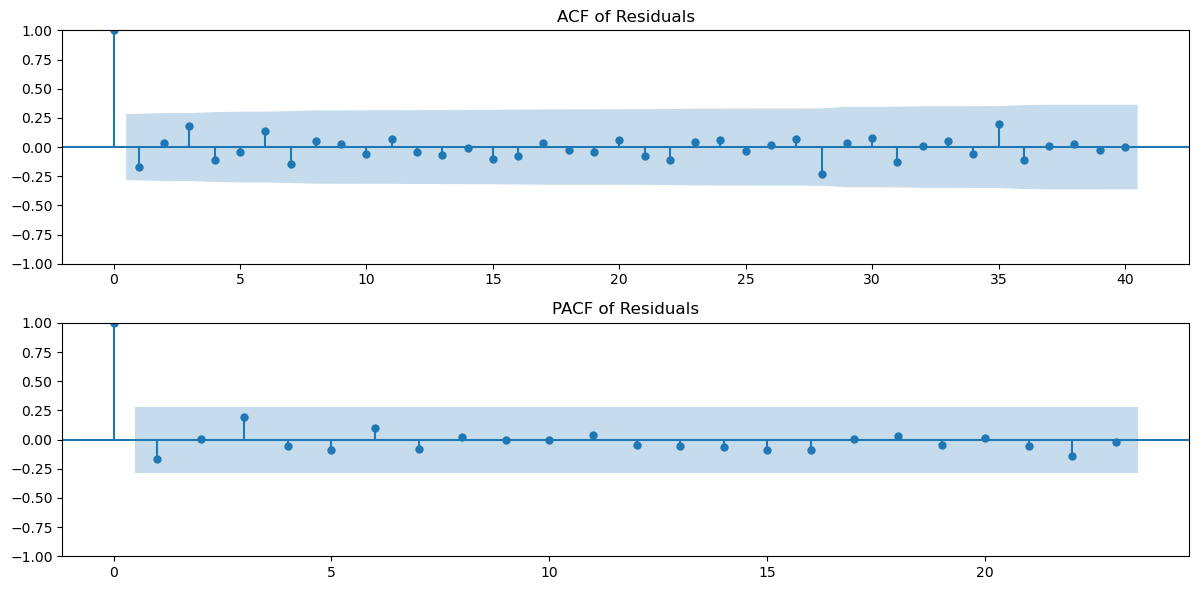

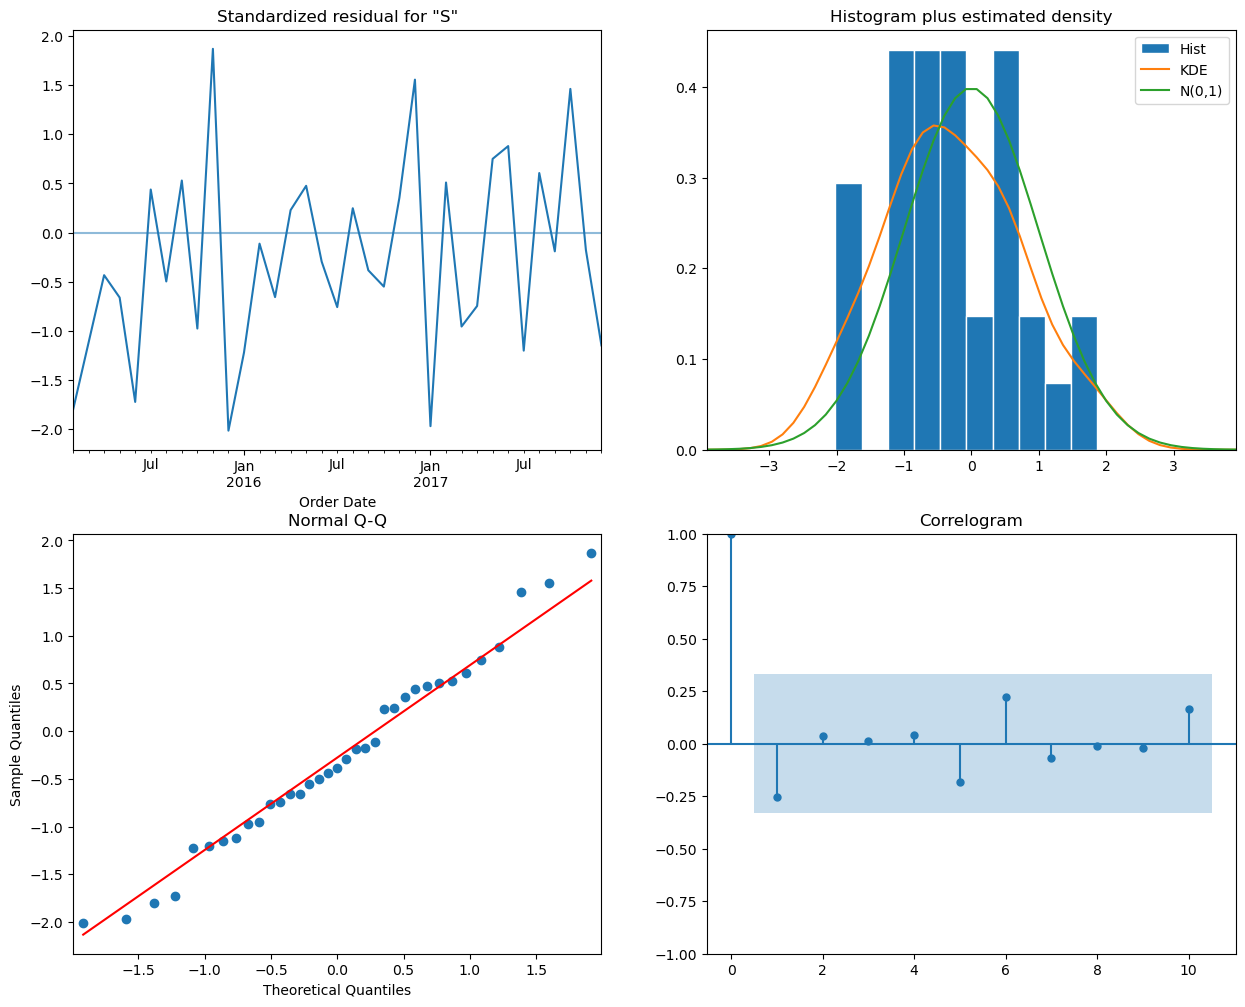

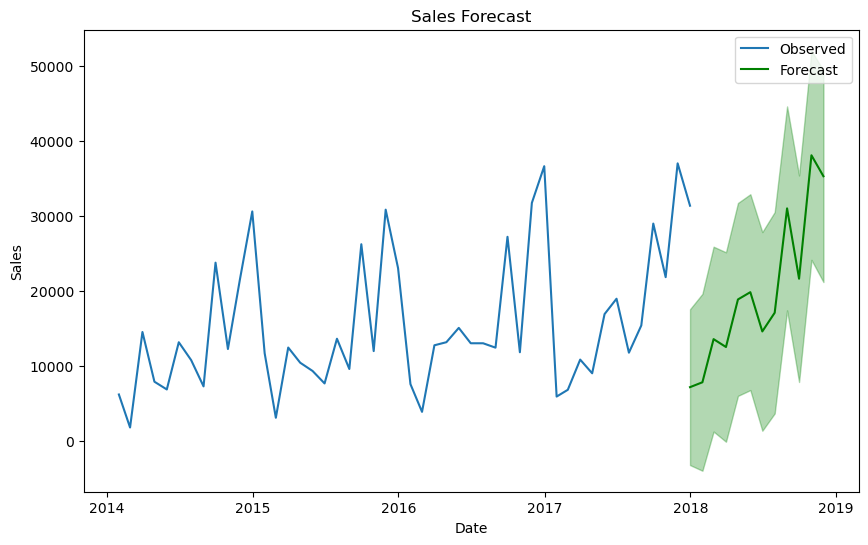

In [63]:
# Extract residuals from the fitted model
residuals = model_results.resid

# Plot ACF of the residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals.dropna(), ax=plt.gca(), lags=40)
plt.title('ACF of Residuals')

# Plot PACF of the residuals
plt.subplot(212)
plot_pacf(residuals.dropna(), ax=plt.gca(), lags=23)
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

# Diagnostics
model_results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting
forecast = model_results.get_forecast(steps=12)
forecast_index = pd.date_range(start=monthly_resampled_df.index[-1], periods=12, freq='M')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(monthly_resampled_df['Sales'], label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='green')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [65]:
monthly_resampled_df

,Discount,Sales,Quantity,Profit,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Region_Central,Region_East,...,State_Wisconsin,State_Wyoming,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Year
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-01-31,0.201923,6242.5250,70,805.4665,5,3,11,1,4,3,...,0,0,5,0,3,12,14,3,3,2014
2014-02-28,0.160000,1839.6580,23,120.6917,0,2,4,1,4,0,...,0,0,1,1,2,3,5,1,1,2014
2014-03-31,0.203088,14573.9560,131,-1128.6550,3,12,10,8,7,7,...,0,0,4,1,4,24,16,9,8,2014
2014-04-30,0.113095,7944.8370,81,554.3801,1,7,11,7,4,6,...,0,0,2,1,4,19,9,8,9,2014
2014-05-31,0.269792,6912.7870,97,-349.8776,2,9,9,4,9,7,...,1,0,3,2,5,14,15,9,0,2014
2014-06-30,0.170351,13206.1256,122,596.3153,3,8,11,8,8,8,...,0,0,2,0,6,22,21,6,3,2014
2014-07-31,0.176481,10821.0510,114,374.2467,2,13,12,6,5,7,...,0,0,4,2,3,24,15,12,6,2014
2014-08-31,0.147917,7320.3465,107,663.4717,2,5,12,5,3,4,...,0,0,4,0,5,15,15,8,1,2014
2014-09-30,0.149097,23816.4808,208,1858.5976,5,15,28,8,14,24,...,0,0,11,3,11,31,31,13,12,2014


## 4. Identify correlated variables

In [ ]:
#

## 5. Summary